In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import figure
from datetime import datetime
from collections import Counter

from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.proj3d import proj_transform

# Datasets

## Load Datasets

In [2]:
ufc_1_raw = pd.read_csv('UFC1.csv')
ufc_1_raw.shape

(2954, 453)

In [3]:
ufc_2_raw = pd.read_csv('UFC2.csv')
ufc_2_raw.shape

(3570, 21)

## Functions

In [4]:
def data_grapher(feature): 
    
    columns = ["Round1" + feature, "Round2" + feature, "Round3" + feature, "Round4" + feature, "Round5" + feature]
    data = [ufc_1_raw[column].values for column in columns]
    rounds = ["Round 1", "Round 2", "Round 3", "Round 4", "Round 5"]
    data_dict = {key:value for key in rounds for value in data}
    
    
    for element in data:
        plt.scatter(np.arange(len(element)),  element)
    
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [5,5]
    plt.show()

def mean_grapher(feature): 
    columns = ["Round1_" + feature, "Round2_" + feature, "Round3_" + feature, "Round4_" + feature, "Round5_" + feature]
    data = [np.mean(ufc_1_raw[column].values) for column in columns]
    plt.scatter(np.arange(1,len(data)+1), data)
    plt.plot(np.arange(1,len(data)+1), data, color = "r")
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [10,10]
    plt.show
    
def data_per_fighter(Name): 
    
    winners = list(ufc_2_raw["Winner"].values)
    win_count = Counter(winners)
    
    losers = list(ufc_2_raw["Loser"].values)
    loss_count = Counter(losers)
    
    win_loss = {Name:[str(win_count[Name]), str(loss_count[Name])]}
    win_loss_df = pd.DataFrame.from_dict(win_loss, orient='index')
    win_loss_df.columns = ["Wins", "Loss"]
    
    name_wins_df = ufc_2_raw[ufc_2_raw["Winner"] == Name]
    win_type_name = Counter(list(name_wins_df["Method"].values))
    win_loss_df["Wins by Decision"] = win_type_name['DEC']
    win_loss_df["Wins by Knockout"] = win_type_name['KO']
    win_loss_df["Wins by Submission"] = win_type_name['SUB']
    win_loss_df["Other Wins"] = win_type_name['OTHER']

    
    name_losses_df = ufc_2_raw[ufc_2_raw["Loser"] == Name]
    loss_type_name = Counter(list(name_losses_df["Method"].values))
    win_loss_df["Losses by Decision"] = loss_type_name['DEC']
    win_loss_df["Losses by Knockout"] = loss_type_name['KO']
    win_loss_df["Losses by Submission"] = loss_type_name['SUB']
    win_loss_df["Other Losses"] = loss_type_name['OTHER']

    return win_loss_df

def data_name(list_fighter_names, win_or_loss): 
    
    if win_or_loss == 'Loss':
        
        chosen_names = losers_df.loc[list_fighter_names][["Losses by Decision", "Losses by Knockout", "Losses by Submission", "Fighter"]]
        
        return np.array(chosen_names.values)
    
    else:
        
        chosen_names = winners_df.loc[list_fighter_names][["Wins by Decision", "Wins by Knockout", "Wins by Submission", "Fighter"]]
        
        return np.array(list(chosen_names.values))

class Annotation3D(Annotation):

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)

def annotate3D(ax, s, *args, **kwargs):

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

## Dataset 1

### Cleaning

In [5]:
cols_ufc_1_raw = [element for element in ufc_1_raw.columns]

ufc_1_raw = ufc_1_raw[['Unnamed: 0', 
                         'Date',
                         'Event_ID',
                         'Fight_ID',
                         'winby',
                         'winner',
                         'corner',
                         'Age',
                         'Height',
                         'HomeTown',
                         'ID',
                         'Location',
                         'Name',
                         'Weight',
                         'Prev',
                         'RStreak',
                         'Last_round',
                         'Max_round',
                         'Round1_Grappling_Reversals_Landed',
                         'Round1_Grappling_Standups_Landed',
                         'Round1_Grappling_Submissions_Attempts',
                         'Round1_Grappling_Takedowns_Attempts',
                         'Round1_Grappling_Takedowns_Landed',
                         'Round1_Strikes_Body Significant Strikes_Attempts',
                         'Round1_Strikes_Body Significant Strikes_Landed',
                         'Round1_Strikes_Body Total Strikes_Attempts',
                         'Round1_Strikes_Body Total Strikes_Landed',
                         'Round1_Strikes_Clinch Body Strikes_Attempts',
                         'Round1_Strikes_Clinch Body Strikes_Landed',
                         'Round1_Strikes_Clinch Head Strikes_Attempts',
                         'Round1_Strikes_Clinch Head Strikes_Landed',
                         'Round1_Strikes_Clinch Leg Strikes_Attempts',
                         'Round1_Strikes_Clinch Leg Strikes_Landed',
                         'Round1_Strikes_Clinch Significant Kicks_Attempts',
                         'Round1_Strikes_Clinch Significant Kicks_Landed',
                         'Round1_Strikes_Clinch Significant Punches_Attempts',
                         'Round1_Strikes_Clinch Significant Punches_Landed',
                         'Round1_Strikes_Clinch Significant Strikes_Attempts',
                         'Round1_Strikes_Clinch Significant Strikes_Landed',
                         'Round1_Strikes_Clinch Total Strikes_Attempts',
                         'Round1_Strikes_Clinch Total Strikes_Landed',
                         'Round1_Strikes_Distance Body Kicks_Attempts',
                         'Round1_Strikes_Distance Body Kicks_Landed',
                         'Round1_Strikes_Distance Body Punches_Attempts',
                         'Round1_Strikes_Distance Body Punches_Landed',
                         'Round1_Strikes_Distance Body Strikes_Attempts',
                         'Round1_Strikes_Distance Body Strikes_Landed',
                         'Round1_Strikes_Distance Head Kicks_Attempts',
                         'Round1_Strikes_Distance Head Kicks_Landed',
                         'Round1_Strikes_Distance Head Punches_Attempts',
                         'Round1_Strikes_Distance Head Punches_Landed',
                         'Round1_Strikes_Distance Head Strikes_Attempts',
                         'Round1_Strikes_Distance Head Strikes_Landed',
                         'Round1_Strikes_Distance Leg Kicks_Attempts',
                         'Round1_Strikes_Distance Leg Kicks_Landed',
                         'Round1_Strikes_Distance Leg Strikes_Attempts',
                         'Round1_Strikes_Distance Leg Strikes_Landed',
                         'Round1_Strikes_Distance Strikes_Attempts',
                         'Round1_Strikes_Distance Strikes_Landed',
                         'Round1_Strikes_Ground Body Strikes_Attempts',
                         'Round1_Strikes_Ground Body Strikes_Landed',
                         'Round1_Strikes_Ground Head Strikes_Attempts',
                         'Round1_Strikes_Ground Head Strikes_Landed',
                         'Round1_Strikes_Ground Leg Strikes_Attempts',
                         'Round1_Strikes_Ground Leg Strikes_Landed',
                         'Round1_Strikes_Ground Significant Kicks_Attempts',
                         'Round1_Strikes_Ground Significant Kicks_Landed',
                         'Round1_Strikes_Ground Significant Punches_Attempts',
                         'Round1_Strikes_Ground Significant Punches_Landed',
                         'Round1_Strikes_Ground Significant Strikes_Attempts',
                         'Round1_Strikes_Ground Significant Strikes_Landed',
                         'Round1_Strikes_Ground Total Strikes_Attempts',
                         'Round1_Strikes_Ground Total Strikes_Landed',
                         'Round1_Strikes_Head Significant Strikes_Attempts',
                         'Round1_Strikes_Head Significant Strikes_Landed',
                         'Round1_Strikes_Head Total Strikes_Attempts',
                         'Round1_Strikes_Head Total Strikes_Landed',
                         'Round1_Strikes_Kicks_Attempts',
                         'Round1_Strikes_Kicks_Landed',
                         'Round1_Strikes_Knock Down_Landed',
                         'Round1_Strikes_Leg Total Strikes_Attempts',
                         'Round1_Strikes_Leg Total Strikes_Landed',
                         'Round1_Strikes_Legs Significant Strikes_Attempts',
                         'Round1_Strikes_Legs Significant Strikes_Landed',
                         'Round1_Strikes_Legs Total Strikes_Attempts',
                         'Round1_Strikes_Legs Total Strikes_Landed',
                         'Round1_Strikes_Punches_Attempts',
                         'Round1_Strikes_Punches_Landed',
                         'Round1_Strikes_Significant Strikes_Attempts',
                         'Round1_Strikes_Significant Strikes_Landed',
                         'Round1_Strikes_Total Strikes_Attempts',
                         'Round1_Strikes_Total Strikes_Landed',
                         'Round1_TIP_Back Control Time',
                         'Round1_TIP_Clinch Time',
                         'Round1_TIP_Control Time',
                         'Round1_TIP_Distance Time',
                         'Round1_TIP_Ground Control Time',
                         'Round1_TIP_Ground Time',
                         'Round1_TIP_Guard Control Time',
                         'Round1_TIP_Half Guard Control Time',
                         'Round1_TIP_Misc. Ground Control Time',
                         'Round1_TIP_Mount Control Time',
                         'Round1_TIP_Neutral Time',
                         'Round1_TIP_Side Control Time',
                         'Round1_TIP_Standing Time',
                         'Round2_Grappling_Reversals_Landed',
                         'Round2_Grappling_Standups_Landed',
                         'Round2_Grappling_Submissions_Attempts',
                         'Round2_Grappling_Takedowns_Attempts',
                         'Round2_Grappling_Takedowns_Landed',
                         'Round2_Strikes_Body Significant Strikes_Attempts',
                         'Round2_Strikes_Body Significant Strikes_Landed',
                         'Round2_Strikes_Body Total Strikes_Attempts',
                         'Round2_Strikes_Body Total Strikes_Landed',
                         'Round2_Strikes_Clinch Body Strikes_Attempts',
                         'Round2_Strikes_Clinch Body Strikes_Landed',
                         'Round2_Strikes_Clinch Head Strikes_Attempts',
                         'Round2_Strikes_Clinch Head Strikes_Landed',
                         'Round2_Strikes_Clinch Leg Strikes_Attempts',
                         'Round2_Strikes_Clinch Leg Strikes_Landed',
                         'Round2_Strikes_Clinch Significant Kicks_Attempts',
                         'Round2_Strikes_Clinch Significant Kicks_Landed',
                         'Round2_Strikes_Clinch Significant Punches_Attempts',
                         'Round2_Strikes_Clinch Significant Punches_Landed',
                         'Round2_Strikes_Clinch Significant Strikes_Attempts',
                         'Round2_Strikes_Clinch Significant Strikes_Landed',
                         'Round2_Strikes_Clinch Total Strikes_Attempts',
                         'Round2_Strikes_Clinch Total Strikes_Landed',
                         'Round2_Strikes_Distance Body Kicks_Attempts',
                         'Round2_Strikes_Distance Body Kicks_Landed',
                         'Round2_Strikes_Distance Body Punches_Attempts',
                         'Round2_Strikes_Distance Body Punches_Landed',
                         'Round2_Strikes_Distance Body Strikes_Attempts',
                         'Round2_Strikes_Distance Body Strikes_Landed',
                         'Round2_Strikes_Distance Head Kicks_Attempts',
                         'Round2_Strikes_Distance Head Kicks_Landed',
                         'Round2_Strikes_Distance Head Punches_Attempts',
                         'Round2_Strikes_Distance Head Punches_Landed',
                         'Round2_Strikes_Distance Head Strikes_Attempts',
                         'Round2_Strikes_Distance Head Strikes_Landed',
                         'Round2_Strikes_Distance Leg Kicks_Attempts',
                         'Round2_Strikes_Distance Leg Kicks_Landed',
                         'Round2_Strikes_Distance Leg Strikes_Attempts',
                         'Round2_Strikes_Distance Leg Strikes_Landed',
                         'Round2_Strikes_Distance Strikes_Attempts',
                         'Round2_Strikes_Distance Strikes_Landed',
                         'Round2_Strikes_Ground Body Strikes_Attempts',
                         'Round2_Strikes_Ground Body Strikes_Landed',
                         'Round2_Strikes_Ground Head Strikes_Attempts',
                         'Round2_Strikes_Ground Head Strikes_Landed',
                         'Round2_Strikes_Ground Leg Strikes_Attempts',
                         'Round2_Strikes_Ground Leg Strikes_Landed',
                         'Round2_Strikes_Ground Significant Kicks_Attempts',
                         'Round2_Strikes_Ground Significant Kicks_Landed',
                         'Round2_Strikes_Ground Significant Punches_Attempts',
                         'Round2_Strikes_Ground Significant Punches_Landed',
                         'Round2_Strikes_Ground Significant Strikes_Attempts',
                         'Round2_Strikes_Ground Significant Strikes_Landed',
                         'Round2_Strikes_Ground Total Strikes_Attempts',
                         'Round2_Strikes_Ground Total Strikes_Landed',
                         'Round2_Strikes_Head Significant Strikes_Attempts',
                         'Round2_Strikes_Head Significant Strikes_Landed',
                         'Round2_Strikes_Head Total Strikes_Attempts',
                         'Round2_Strikes_Head Total Strikes_Landed',
                         'Round2_Strikes_Kicks_Attempts',
                         'Round2_Strikes_Kicks_Landed',
                         'Round2_Strikes_Knock Down_Landed',
                         'Round2_Strikes_Leg Total Strikes_Attempts',
                         'Round2_Strikes_Leg Total Strikes_Landed',
                         'Round2_Strikes_Legs Significant Strikes_Attempts',
                         'Round2_Strikes_Legs Significant Strikes_Landed',
                         'Round2_Strikes_Legs Total Strikes_Attempts',
                         'Round2_Strikes_Legs Total Strikes_Landed',
                         'Round2_Strikes_Punches_Attempts',
                         'Round2_Strikes_Punches_Landed',
                         'Round2_Strikes_Significant Strikes_Attempts',
                         'Round2_Strikes_Significant Strikes_Landed',
                         'Round2_Strikes_Total Strikes_Attempts',
                         'Round2_Strikes_Total Strikes_Landed',
                         'Round2_TIP_Back Control Time',
                         'Round2_TIP_Clinch Time',
                         'Round2_TIP_Control Time',
                         'Round2_TIP_Distance Time',
                         'Round2_TIP_Ground Control Time',
                         'Round2_TIP_Ground Time',
                         'Round2_TIP_Guard Control Time',
                         'Round2_TIP_Half Guard Control Time',
                         'Round2_TIP_Misc. Ground Control Time',
                         'Round2_TIP_Mount Control Time',
                         'Round2_TIP_Neutral Time',
                         'Round2_TIP_Side Control Time',
                         'Round2_TIP_Standing Time',
                         'Round3_Grappling_Reversals_Landed',
                         'Round3_Grappling_Standups_Landed',
                         'Round3_Grappling_Submissions_Attempts',
                         'Round3_Grappling_Takedowns_Attempts',
                         'Round3_Grappling_Takedowns_Landed',
                         'Round3_Strikes_Body Significant Strikes_Attempts',
                         'Round3_Strikes_Body Significant Strikes_Landed',
                         'Round3_Strikes_Body Total Strikes_Attempts',
                         'Round3_Strikes_Body Total Strikes_Landed',
                         'Round3_Strikes_Clinch Body Strikes_Attempts',
                         'Round3_Strikes_Clinch Body Strikes_Landed',
                         'Round3_Strikes_Clinch Head Strikes_Attempts',
                         'Round3_Strikes_Clinch Head Strikes_Landed',
                         'Round3_Strikes_Clinch Leg Strikes_Attempts',
                         'Round3_Strikes_Clinch Leg Strikes_Landed',
                         'Round3_Strikes_Clinch Significant Kicks_Attempts',
                         'Round3_Strikes_Clinch Significant Kicks_Landed',
                         'Round3_Strikes_Clinch Significant Punches_Attempts',
                         'Round3_Strikes_Clinch Significant Punches_Landed',
                         'Round3_Strikes_Clinch Significant Strikes_Attempts',
                         'Round3_Strikes_Clinch Significant Strikes_Landed',
                         'Round3_Strikes_Clinch Total Strikes_Attempts',
                         'Round3_Strikes_Clinch Total Strikes_Landed',
                         'Round3_Strikes_Distance Body Kicks_Attempts',
                         'Round3_Strikes_Distance Body Kicks_Landed',
                         'Round3_Strikes_Distance Body Punches_Attempts',
                         'Round3_Strikes_Distance Body Punches_Landed',
                         'Round3_Strikes_Distance Body Strikes_Attempts',
                         'Round3_Strikes_Distance Body Strikes_Landed',
                         'Round3_Strikes_Distance Head Kicks_Attempts',
                         'Round3_Strikes_Distance Head Kicks_Landed',
                         'Round3_Strikes_Distance Head Punches_Attempts',
                         'Round3_Strikes_Distance Head Punches_Landed',
                         'Round3_Strikes_Distance Head Strikes_Attempts',
                         'Round3_Strikes_Distance Head Strikes_Landed',
                         'Round3_Strikes_Distance Leg Kicks_Attempts',
                         'Round3_Strikes_Distance Leg Kicks_Landed',
                         'Round3_Strikes_Distance Leg Strikes_Attempts',
                         'Round3_Strikes_Distance Leg Strikes_Landed',
                         'Round3_Strikes_Distance Strikes_Attempts',
                         'Round3_Strikes_Distance Strikes_Landed',
                         'Round3_Strikes_Ground Body Strikes_Attempts',
                         'Round3_Strikes_Ground Body Strikes_Landed',
                         'Round3_Strikes_Ground Head Strikes_Attempts',
                         'Round3_Strikes_Ground Head Strikes_Landed',
                         'Round3_Strikes_Ground Leg Strikes_Attempts',
                         'Round3_Strikes_Ground Leg Strikes_Landed',
                         'Round3_Strikes_Ground Significant Kicks_Attempts',
                         'Round3_Strikes_Ground Significant Kicks_Landed',
                         'Round3_Strikes_Ground Significant Punches_Attempts',
                         'Round3_Strikes_Ground Significant Punches_Landed',
                         'Round3_Strikes_Ground Significant Strikes_Attempts',
                         'Round3_Strikes_Ground Significant Strikes_Landed',
                         'Round3_Strikes_Ground Total Strikes_Attempts',
                         'Round3_Strikes_Ground Total Strikes_Landed',
                         'Round3_Strikes_Head Significant Strikes_Attempts',
                         'Round3_Strikes_Head Significant Strikes_Landed',
                         'Round3_Strikes_Head Total Strikes_Attempts',
                         'Round3_Strikes_Head Total Strikes_Landed',
                         'Round3_Strikes_Kicks_Attempts',
                         'Round3_Strikes_Kicks_Landed',
                         'Round3_Strikes_Knock Down_Landed',
                         'Round3_Strikes_Leg Total Strikes_Attempts',
                         'Round3_Strikes_Leg Total Strikes_Landed',
                         'Round3_Strikes_Legs Significant Strikes_Attempts',
                         'Round3_Strikes_Legs Significant Strikes_Landed',
                         'Round3_Strikes_Legs Total Strikes_Attempts',
                         'Round3_Strikes_Legs Total Strikes_Landed',
                         'Round3_Strikes_Punches_Attempts',
                         'Round3_Strikes_Punches_Landed',
                         'Round3_Strikes_Significant Strikes_Attempts',
                         'Round3_Strikes_Significant Strikes_Landed',
                         'Round3_Strikes_Total Strikes_Attempts',
                         'Round3_Strikes_Total Strikes_Landed',
                         'Round3_TIP_Back Control Time',
                         'Round3_TIP_Clinch Time',
                         'Round3_TIP_Control Time',
                         'Round3_TIP_Distance Time',
                         'Round3_TIP_Ground Control Time',
                         'Round3_TIP_Ground Time',
                         'Round3_TIP_Guard Control Time',
                         'Round3_TIP_Half Guard Control Time',
                         'Round3_TIP_Misc. Ground Control Time',
                         'Round3_TIP_Mount Control Time',
                         'Round3_TIP_Neutral Time',
                         'Round3_TIP_Side Control Time',
                         'Round3_TIP_Standing Time',
                         'Round4_Grappling_Reversals_Landed',
                         'Round4_Grappling_Standups_Landed',
                         'Round4_Grappling_Submissions_Attempts',
                         'Round4_Grappling_Takedowns_Attempts',
                         'Round4_Grappling_Takedowns_Landed',
                         'Round4_Strikes_Body Significant Strikes_Attempts',
                         'Round4_Strikes_Body Significant Strikes_Landed',
                         'Round4_Strikes_Body Total Strikes_Attempts',
                         'Round4_Strikes_Body Total Strikes_Landed',
                         'Round4_Strikes_Clinch Body Strikes_Attempts',
                         'Round4_Strikes_Clinch Body Strikes_Landed',
                         'Round4_Strikes_Clinch Head Strikes_Attempts',
                         'Round4_Strikes_Clinch Head Strikes_Landed',
                         'Round4_Strikes_Clinch Leg Strikes_Attempts',
                         'Round4_Strikes_Clinch Leg Strikes_Landed',
                         'Round4_Strikes_Clinch Significant Kicks_Attempts',
                         'Round4_Strikes_Clinch Significant Kicks_Landed',
                         'Round4_Strikes_Clinch Significant Punches_Attempts',
                         'Round4_Strikes_Clinch Significant Punches_Landed',
                         'Round4_Strikes_Clinch Significant Strikes_Attempts',
                         'Round4_Strikes_Clinch Significant Strikes_Landed',
                         'Round4_Strikes_Clinch Total Strikes_Attempts',
                         'Round4_Strikes_Clinch Total Strikes_Landed',
                         'Round4_Strikes_Distance Body Kicks_Attempts',
                         'Round4_Strikes_Distance Body Kicks_Landed',
                         'Round4_Strikes_Distance Body Punches_Attempts',
                         'Round4_Strikes_Distance Body Punches_Landed',
                         'Round4_Strikes_Distance Body Strikes_Attempts',
                         'Round4_Strikes_Distance Body Strikes_Landed',
                         'Round4_Strikes_Distance Head Kicks_Attempts',
                         'Round4_Strikes_Distance Head Kicks_Landed',
                         'Round4_Strikes_Distance Head Punches_Attempts',
                         'Round4_Strikes_Distance Head Punches_Landed',
                         'Round4_Strikes_Distance Head Strikes_Attempts',
                         'Round4_Strikes_Distance Head Strikes_Landed',
                         'Round4_Strikes_Distance Leg Kicks_Attempts',
                         'Round4_Strikes_Distance Leg Kicks_Landed',
                         'Round4_Strikes_Distance Leg Strikes_Attempts',
                         'Round4_Strikes_Distance Leg Strikes_Landed',
                         'Round4_Strikes_Distance Strikes_Attempts',
                         'Round4_Strikes_Distance Strikes_Landed',
                         'Round4_Strikes_Ground Body Strikes_Attempts',
                         'Round4_Strikes_Ground Body Strikes_Landed',
                         'Round4_Strikes_Ground Head Strikes_Attempts',
                         'Round4_Strikes_Ground Head Strikes_Landed',
                         'Round4_Strikes_Ground Leg Strikes_Attempts',
                         'Round4_Strikes_Ground Leg Strikes_Landed',
                         'Round4_Strikes_Ground Significant Kicks_Attempts',
                         'Round4_Strikes_Ground Significant Kicks_Landed',
                         'Round4_Strikes_Ground Significant Punches_Attempts',
                         'Round4_Strikes_Ground Significant Punches_Landed',
                         'Round4_Strikes_Ground Significant Strikes_Attempts',
                         'Round4_Strikes_Ground Significant Strikes_Landed',
                         'Round4_Strikes_Ground Total Strikes_Attempts',
                         'Round4_Strikes_Ground Total Strikes_Landed',
                         'Round4_Strikes_Head Significant Strikes_Attempts',
                         'Round4_Strikes_Head Significant Strikes_Landed',
                         'Round4_Strikes_Head Total Strikes_Attempts',
                         'Round4_Strikes_Head Total Strikes_Landed',
                         'Round4_Strikes_Kicks_Attempts',
                         'Round4_Strikes_Kicks_Landed',
                         'Round4_Strikes_Knock Down_Landed',
                         'Round4_Strikes_Leg Total Strikes_Attempts',
                         'Round4_Strikes_Leg Total Strikes_Landed',
                         'Round4_Strikes_Legs Significant Strikes_Attempts',
                         'Round4_Strikes_Legs Significant Strikes_Landed',
                         'Round4_Strikes_Legs Total Strikes_Attempts',
                         'Round4_Strikes_Legs Total Strikes_Landed',
                         'Round4_Strikes_Punches_Attempts',
                         'Round4_Strikes_Punches_Landed',
                         'Round4_Strikes_Significant Strikes_Attempts',
                         'Round4_Strikes_Significant Strikes_Landed',
                         'Round4_Strikes_Total Strikes_Attempts',
                         'Round4_Strikes_Total Strikes_Landed',
                         'Round4_TIP_Back Control Time',
                         'Round4_TIP_Clinch Time',
                         'Round4_TIP_Control Time',
                         'Round4_TIP_Distance Time',
                         'Round4_TIP_Ground Control Time',
                         'Round4_TIP_Ground Time',
                         'Round4_TIP_Guard Control Time',
                         'Round4_TIP_Half Guard Control Time',
                         'Round4_TIP_Misc. Ground Control Time',
                         'Round4_TIP_Mount Control Time',
                         'Round4_TIP_Neutral Time',
                         'Round4_TIP_Side Control Time',
                         'Round4_TIP_Standing Time',
                         'Round5_Grappling_Reversals_Landed',
                         'Round5_Grappling_Standups_Landed',
                         'Round5_Grappling_Submissions_Attempts',
                         'Round5_Grappling_Takedowns_Attempts',
                         'Round5_Grappling_Takedowns_Landed',
                         'Round5_Strikes_Body Significant Strikes_Attempts',
                         'Round5_Strikes_Body Significant Strikes_Landed',
                         'Round5_Strikes_Body Total Strikes_Attempts',
                         'Round5_Strikes_Body Total Strikes_Landed',
                         'Round5_Strikes_Clinch Body Strikes_Attempts',
                         'Round5_Strikes_Clinch Body Strikes_Landed',
                         'Round5_Strikes_Clinch Head Strikes_Attempts',
                         'Round5_Strikes_Clinch Head Strikes_Landed',
                         'Round5_Strikes_Clinch Leg Strikes_Attempts',
                         'Round5_Strikes_Clinch Leg Strikes_Landed',
                         'Round5_Strikes_Clinch Significant Kicks_Attempts',
                         'Round5_Strikes_Clinch Significant Kicks_Landed',
                         'Round5_Strikes_Clinch Significant Punches_Attempts',
                         'Round5_Strikes_Clinch Significant Punches_Landed',
                         'Round5_Strikes_Clinch Significant Strikes_Attempts',
                         'Round5_Strikes_Clinch Significant Strikes_Landed',
                         'Round5_Strikes_Clinch Total Strikes_Attempts',
                         'Round5_Strikes_Clinch Total Strikes_Landed',
                         'Round5_Strikes_Distance Body Kicks_Attempts',
                         'Round5_Strikes_Distance Body Kicks_Landed',
                         'Round5_Strikes_Distance Body Punches_Attempts',
                         'Round5_Strikes_Distance Body Punches_Landed',
                         'Round5_Strikes_Distance Body Strikes_Attempts',
                         'Round5_Strikes_Distance Body Strikes_Landed',
                         'Round5_Strikes_Distance Head Kicks_Attempts',
                         'Round5_Strikes_Distance Head Kicks_Landed',
                         'Round5_Strikes_Distance Head Punches_Attempts',
                         'Round5_Strikes_Distance Head Punches_Landed',
                         'Round5_Strikes_Distance Head Strikes_Attempts',
                         'Round5_Strikes_Distance Head Strikes_Landed',
                         'Round5_Strikes_Distance Leg Kicks_Attempts',
                         'Round5_Strikes_Distance Leg Kicks_Landed',
                         'Round5_Strikes_Distance Leg Strikes_Attempts',
                         'Round5_Strikes_Distance Leg Strikes_Landed',
                         'Round5_Strikes_Distance Strikes_Attempts',
                         'Round5_Strikes_Distance Strikes_Landed',
                         'Round5_Strikes_Ground Body Strikes_Attempts',
                         'Round5_Strikes_Ground Body Strikes_Landed',
                         'Round5_Strikes_Ground Head Strikes_Attempts',
                         'Round5_Strikes_Ground Head Strikes_Landed',
                         'Round5_Strikes_Ground Leg Strikes_Attempts',
                         'Round5_Strikes_Ground Leg Strikes_Landed',
                         'Round5_Strikes_Ground Significant Kicks_Attempts',
                         'Round5_Strikes_Ground Significant Kicks_Landed',
                         'Round5_Strikes_Ground Significant Punches_Attempts',
                         'Round5_Strikes_Ground Significant Punches_Landed',
                         'Round5_Strikes_Ground Significant Strikes_Attempts',
                         'Round5_Strikes_Ground Significant Strikes_Landed',
                         'Round5_Strikes_Ground Total Strikes_Attempts',
                         'Round5_Strikes_Ground Total Strikes_Landed',
                         'Round5_Strikes_Head Significant Strikes_Attempts',
                         'Round5_Strikes_Head Significant Strikes_Landed',
                         'Round5_Strikes_Head Total Strikes_Attempts',
                         'Round5_Strikes_Head Total Strikes_Landed',
                         'Round5_Strikes_Kicks_Attempts',
                         'Round5_Strikes_Kicks_Landed',
                         'Round5_Strikes_Knock Down_Landed',
                         'Round5_Strikes_Leg Total Strikes_Attempts',
                         'Round5_Strikes_Leg Total Strikes_Landed',
                         'Round5_Strikes_Legs Significant Strikes_Attempts',
                         'Round5_Strikes_Legs Significant Strikes_Landed',
                         'Round5_Strikes_Legs Total Strikes_Attempts',
                         'Round5_Strikes_Legs Total Strikes_Landed',
                         'Round5_Strikes_Punches_Attempts',
                         'Round5_Strikes_Punches_Landed',
                         'Round5_Strikes_Significant Strikes_Attempts',
                         'Round5_Strikes_Significant Strikes_Landed',
                         'Round5_Strikes_Total Strikes_Attempts',
                         'Round5_Strikes_Total Strikes_Landed',
                         'Round5_TIP_Back Control Time',
                         'Round5_TIP_Clinch Time',
                         'Round5_TIP_Control Time',
                         'Round5_TIP_Distance Time',
                         'Round5_TIP_Ground Control Time',
                         'Round5_TIP_Ground Time',
                         'Round5_TIP_Guard Control Time',
                         'Round5_TIP_Half Guard Control Time',
                         'Round5_TIP_Misc. Ground Control Time',
                         'Round5_TIP_Mount Control Time',
                         'Round5_TIP_Neutral Time',
                         'Round5_TIP_Side Control Time',
                         'Round5_TIP_Standing Time']]

ufc_1_raw.drop(["Unnamed: 0"], inplace = True, axis = 1)

ufc_1_raw.sort_values(by = ['Date'], inplace = True)

ufc_1_raw.set_index("Fight_ID", inplace = True)

ufc_1_raw.sort_index(inplace = True)

## Dataset 2

### Cleaning

In [6]:
# Clean and get relevant variables 

cols_ufc_2_raw = [element for element in ufc_2_raw.columns]

ufc_2_raw = ufc_2_raw[[
                       'event_date',
                       'eid',
                       'mid',
                       'event_name',
                       'event_org',
                       'event_place',
                       'f1name',
                       'f2name',
                       'f1result',
                       'f2result',
                       'f1fid',
                       'f2fid',
                       'method',
                       'method_d',
                       'ref',
                       'round',
                       'time',]]

ufc_2_raw.drop([3569], inplace = True)

dates_ufc_2_raw = []
for date in ufc_2_raw["event_date"].values: 
    try:
        new_date = datetime.strptime(date, '%m/%d/%Y')
    except ValueError:
        try: 
            new_date = datetime.strptime(date,'%Y-%m-%d')
        except ValueError:
            new_date = datetime.strptime(date,'%d/%m/%Y')
    
    dates_ufc_2_raw.append(new_date)

ufc_2_raw["event_date"] = dates_ufc_2_raw

ufc_2_raw.sort_values(by = ['event_date'], inplace = True)

ufc_2_raw.sort_index(inplace = True)

ufc_2_raw = ufc_2_raw[['event_date', 'event_place', 'f1name', 'f2name', 'f1result', 'f2result', 'method','method_d',
                       'round', 'time']]

event_place = [",".join(place.split(",")[2:]) for place in ufc_2_raw["event_place"]]

ufc_2_raw["event_place"] = event_place

years = pd.DatetimeIndex(ufc_2_raw["event_date"][:len(ufc_2_raw["event_date"])]).year

years_dict = Counter(years)
years_dict ={
         1993: 8,
         1994: 31,
         1995: 31,
         1996: 43,
         1997: 34,
         1998: 25,
         1999: 37,
         2000: 43,
         2001: 40,
         2002: 53,
         2003: 41,
         2004: 39,
         2005: 80,
         2006: 158,
         2007: 171,
         2008: 201,
         2009: 215,
         2010: 253,
         2011: 300,
         2012: 341,
         2013: 386,
         2014: 503,
         2015: 473}

years_df = pd.DataFrame.from_dict(years_dict, orient='index')
years_df.columns = ["Fights per Year"]

fight_dates = pd.DataFrame(ufc_2_raw["event_date"])

fight_dates["Fight"] = np.array([1 for i in range(3569)])

fight_dates.set_index("event_date", inplace = True)

fight_dates.sort_index(inplace = True)

fight_dates_month = fight_dates.resample('3M').sum()

ufc_2_raw.columns = [
    "Even Date", "Event Place",  "Winner", "Loser", "Fighter 1 Result", "Fighter 2 Result", 
                     "Method", "Method in Detail", "Round", "Time"]
ufc_2_raw = ufc_2_raw[[
    "Even Date","Event Place","Winner","Loser","Method","Method in Detail","Round","Time"]]

# Get dataframes for winners and losers 
winners_unique = np.unique(list(ufc_2_raw["Winner"].values))
winners_df_list = [data_per_fighter(fighter) for fighter in winners_unique]

winners_df = pd.concat(winners_df_list)
winners_df["Fighter"] = winners_df.index

losers_unique = np.unique(list(ufc_2_raw["Loser"].values))
losers_df_list = [data_per_fighter(fighter) for fighter in losers_unique]

losers_df = pd.concat(losers_df_list)
losers_df["Fighter"] = losers_df.index

X_win = np.array(winners_df[["Wins by Decision", "Wins by Knockout", "Wins by Submission", "Fighter"]].values)
X_loss = np.array(winners_df[["Losses by Decision", "Losses by Knockout", "Losses by Submission", "Fighter"]].values)

method_count = Counter(list(ufc_2_raw['Method'].values))
method_count = pd.DataFrame.from_dict({k:v for k,v in method_count.items() if v>1}, orient = 'index')
method_count.columns = ['Method'] 
method_count.sort_values('Method', inplace = True)

method_count_detail = Counter(list(ufc_2_raw['Method in Detail'].values))
method_count_detail = pd.DataFrame.from_dict({k:v for k,v in method_count_detail.items() if v>10}, orient = 'index')
method_count_detail.columns = ['Method in Detail']
method_count_detail.sort_values('Method in Detail', inplace = True)

# 2D Plots

Text(0, 0.5, 'Fights')

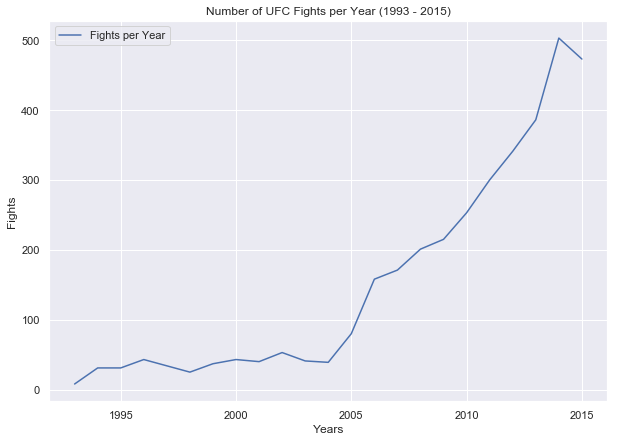

In [7]:
# Plot Annual Number of Fights 
sns.set()
years_df.plot(figsize = (10,7))
plt.title("Number of UFC Fights per Year (1993 - 2015)")
plt.xlabel("Years")
plt.ylabel("Fights")

Text(0, 0.5, 'Fights')

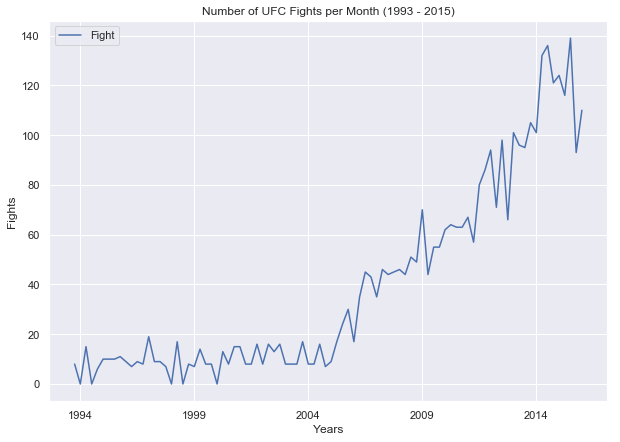

In [8]:
# Plot Monthly Number of Fights 
fight_dates_month.plot(figsize = (10,7))
plt.title("Number of UFC Fights per Month (1993 - 2015)")
plt.xlabel("Years")
plt.ylabel("Fights")

Text(0.5, 0, 'Number of Occurences')

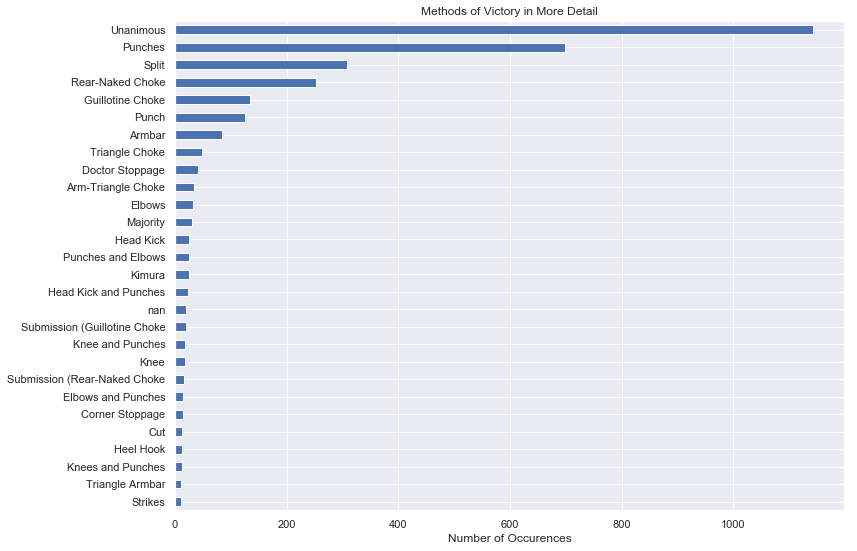

In [9]:
# Plot Methods of Victory 
method_count_detail.plot(kind = 'barh', legend = False, figsize = (12,9))
plt.title('Methods of Victory in More Detail')
plt.xlabel('Number of Occurences')

Text(0.5, 0, 'Number of Occurences')

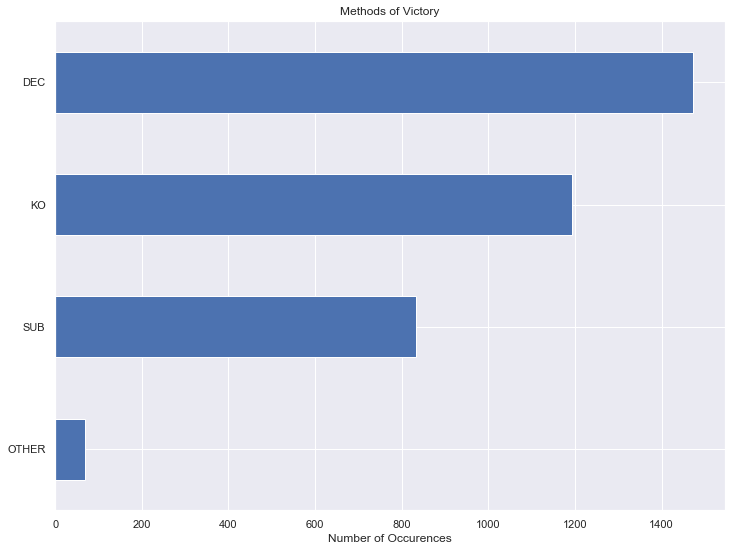

In [10]:
# Plot Detailed Methods of Victory 
method_count.plot(kind = 'barh', legend = False, figsize = (12,9))
plt.title('Methods of Victory')
plt.xlabel('Number of Occurences')

# 3D Plots

In [ ]:
def graph_fighters(list_fighters = None, win_or_loss = None, all_fighters = False):
    
    if all_fighters == True:
        
        fig = plt.figure(figsize = (10,10))
        ax = fig.add_subplot(111, projection='3d')
        
        if win_or_loss == "Loss":
            
            ax.scatter(np.array([float(element) for element in np.array(losers_df["Losses by Decision"].values)]), 
                       np.array([float(element) for element in np.array(losers_df["Losses by Knockout"].values)]), 
                       np.array([float(element) for element in np.array(losers_df["Losses by Submission"].values)]),
                       depthshade = False,
                       c = np.linalg.norm([np.array([float(element) for element in np.array(losers_df["Losses by Decision"].values)]), 
                                           np.array([float(element) for element in np.array(losers_df["Losses by Knockout"].values)]), 
                                           np.array([float(element) for element in np.array(losers_df["Losses by Submission"].values)])],
                                           axis = 0),
                       s = 20)

            ax.set_xlabel("Defeat by Decision", fontsize = 10)
            ax.set_ylabel("Defeat by Knockout", fontsize = 10)
            ax.set_zlabel("Defeat by Submission", fontsize = 10)
            ax.set_title("Methods of Defeat", fontsize = 12)
        
        elif win_or_loss == "Win":
            
            ax.scatter(np.array([float(element) for element in np.array(winners_df["Wins by Decision"].values)]), 
                                  np.array([float(element) for element in np.array(winners_df["Wins by Knockout"].values)]), 
                                  np.array([float(element) for element in np.array(winners_df["Wins by Submission"].values)]),
                                  depthshade = False,
                                  c = np.linalg.norm([np.array([float(element) for element in np.array(winners_df["Wins by Decision"].values)]), 
                                  np.array([float(element) for element in np.array(winners_df["Wins by Knockout"].values)]), 
                                  np.array([float(element) for element in np.array(winners_df["Wins by Submission"].values)])],
                                                    axis = 0),
                                  s = 20)
            
            ax.set_xlabel("Victory by Decision", fontsize = 10)
            ax.set_ylabel("Victory by Knockout", fontsize = 10)
            ax.set_zlabel("Victory by Submission", fontsize = 10)
            ax.set_title("Methods of Victory", fontsize = 12)

        ax.tick_params(labelsize = 9)
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False
        plt.show()
        
    elif all_fighters == False:

        fighter_data = data_name(list_fighters, win_or_loss)

        xn = fighter_data[:,0] # This list contains the number of decision wins or losses by each listed fighter
        yn = fighter_data[:,1] # This list contains the number of kncckout wins or losses by each listed fighter
        zn = fighter_data[:,2] # This list contains the number of submission wins or losses by each listed fighter
        names = fighter_data[:,3]

        group = np.arange(len(xn)) + 1
        edges = []

        xyzn = list(zip(names,list(zip(xn, yn, zn))))

        fig = plt.figure(dpi = 150)
        ax = fig.gca(projection = '3d')

        ax.scatter(xn,yn,zn, marker='o', c = group, s = 20, edgecolors = "k", linewidths = 1)
        ax.tick_params(labelsize = 7)
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False

        if win_or_loss == "Win":
            ax.set_xlabel("Victory by Decision", fontsize = 7)
            ax.set_ylabel("Victory by Knockout", fontsize = 7)
            ax.set_zlabel("Victory by Submission", fontsize = 7)
            ax.set_title("Methods of Victory", fontsize = 8)

        if win_or_loss == "Loss":
            ax.set_xlabel("Defeat by Decision", fontsize = 7)
            ax.set_ylabel("Defeat by Knockout", fontsize = 7)
            ax.set_zlabel("Defeat by Submission", fontsize = 7)
            ax.set_title("Methods of Defeat", fontsize = 8)

        for j, xyz_ in xyzn: 
            annotate3D(ax, s=j, xyz=xyz_, fontsize=6, xytext=(-3,3), textcoords='offset points', ha='right',va='bottom')

        plt.show()

In [11]:
%matplotlib notebook

<IPython.core.display.Javascript object>


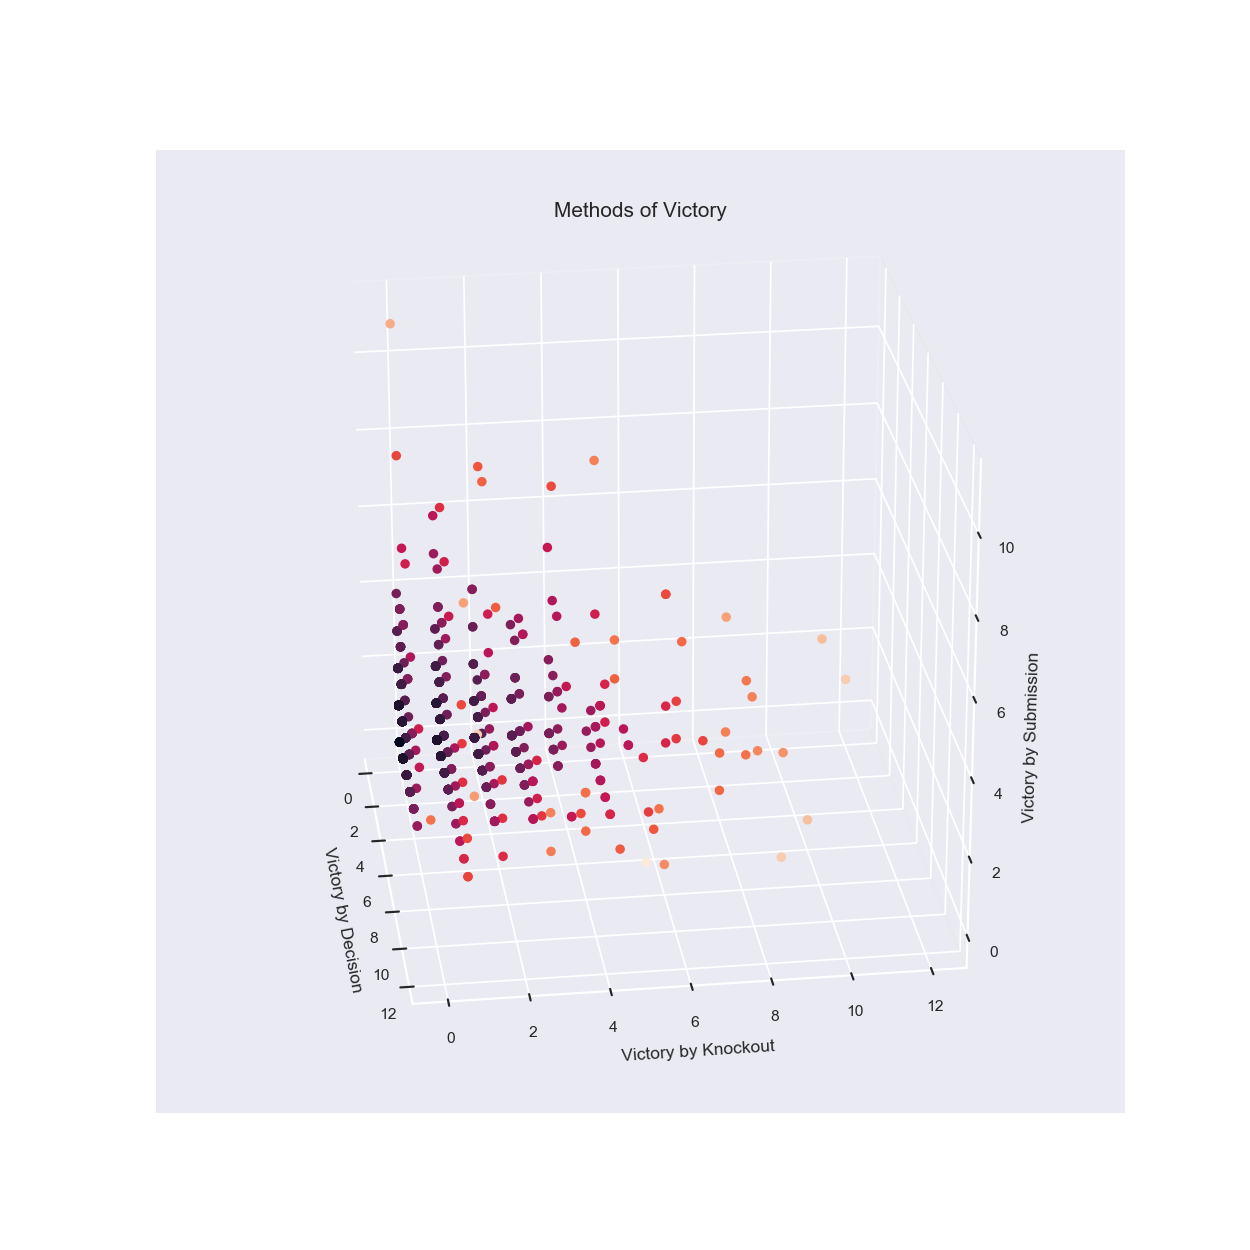

In [13]:
graph_fighters(all_fighters = True,  win_or_loss = "Win")